In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [42]:
#pip install xgboost

In [40]:
#pip install catboost

In [15]:
df=pd.read_csv("insurance2.csv")

In [16]:
df

,Unnamed: 0,age,gender,bmi,children,smoker,region,expenses
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1332,1333,50,male,31.0,3,no,northwest,10600.55
1333,1334,18,female,31.9,0,no,northeast,2205.98
1334,1335,18,female,36.9,0,no,southeast,1629.83
1335,1336,21,female,25.8,0,no,southwest,2007.95


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [23]:
df

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1332,50,1,31.0,3,0,1,10600.55
1333,18,0,31.9,0,0,0,2205.98
1334,18,0,36.9,0,0,2,1629.83
1335,21,0,25.8,0,0,3,2007.95


In [21]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [22]:
df

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1332,50,1,31.0,3,0,1,10600.55
1333,18,0,31.9,0,0,0,2205.98
1334,18,0,36.9,0,0,2,1629.83
1335,21,0,25.8,0,0,3,2007.95


#### Preparing X and Y variables

In [43]:
X = df.drop(columns=['expenses'],axis=1)

In [44]:
y= df.expenses

In [45]:
X.shape

(1337, 6)

In [46]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1069, 6), (268, 6))

#### Create an Evaluate Function to give all metrics after model Training

In [47]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6082.9083
- Mean Absolute Error: 4181.1718
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5957.8958
- Mean Absolute Error: 4182.5973
- R2 Score: 0.8068


Lasso
Model performance for Training set
- Root Mean Squared Error: 6082.9094
- Mean Absolute Error: 4181.5119
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5958.6761
- Mean Absolute Error: 4183.2965
- R2 Score: 0.8068


Ridge
Model performance for Training set
- Root Mean Squared Error: 6083.1465
- Mean Absolute Error: 4190.0047
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5972.4804
- Mean Absolute Error: 4198.4488
- R2 Score: 0.8059


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9005.0156
- Mean Absolute Error: 6126.8083


#### Results

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.887771
5,Random Forest Regressor,0.880510
6,XGBRegressor,0.858134
8,AdaBoost Regressor,0.826037
0,Linear Regression,0.806828
1,Lasso,0.806777
2,Ridge,0.805881
4,Decision Tree,0.765819
3,K-Neighbors Regressor,0.043586


In [54]:
cat_model = CatBoostRegressor()
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


Learning rate set to 0.041377
0:	learn: 11367.1542762	total: 1.95ms	remaining: 1.94s
1:	learn: 11042.6979440	total: 3.29ms	remaining: 1.64s
2:	learn: 10727.9103207	total: 3.96ms	remaining: 1.32s
3:	learn: 10429.3195225	total: 5.46ms	remaining: 1.36s
4:	learn: 10132.0068523	total: 6.88ms	remaining: 1.37s
5:	learn: 9847.7251860	total: 8.71ms	remaining: 1.44s
6:	learn: 9584.8285171	total: 10.1ms	remaining: 1.44s
7:	learn: 9324.4428552	total: 11.8ms	remaining: 1.46s
8:	learn: 9090.0738972	total: 13.7ms	remaining: 1.51s
9:	learn: 8872.0925018	total: 15.3ms	remaining: 1.51s
10:	learn: 8666.6650458	total: 15.8ms	remaining: 1.42s
11:	learn: 8451.4036157	total: 17.3ms	remaining: 1.42s
12:	learn: 8256.1323967	total: 18.8ms	remaining: 1.43s
13:	learn: 8066.8084323	total: 19.4ms	remaining: 1.37s
14:	learn: 7878.5167343	total: 20.8ms	remaining: 1.37s
15:	learn: 7700.3814927	total: 22.2ms	remaining: 1.36s
16:	learn: 7516.5227549	total: 23.4ms	remaining: 1.35s
17:	learn: 7350.0265947	total: 24.9ms	re

150:	learn: 4111.2876174	total: 189ms	remaining: 1.06s
151:	learn: 4108.8916288	total: 190ms	remaining: 1.06s
152:	learn: 4105.5975399	total: 192ms	remaining: 1.06s
153:	learn: 4102.9085194	total: 193ms	remaining: 1.06s
154:	learn: 4101.3076416	total: 195ms	remaining: 1.06s
155:	learn: 4098.5694963	total: 196ms	remaining: 1.06s
156:	learn: 4097.0511647	total: 197ms	remaining: 1.06s
157:	learn: 4094.3490716	total: 199ms	remaining: 1.06s
158:	learn: 4091.8557799	total: 200ms	remaining: 1.06s
159:	learn: 4086.3271777	total: 201ms	remaining: 1.05s
160:	learn: 4084.9362643	total: 202ms	remaining: 1.05s
161:	learn: 4081.3561582	total: 204ms	remaining: 1.05s
162:	learn: 4079.4187140	total: 205ms	remaining: 1.05s
163:	learn: 4076.4837415	total: 207ms	remaining: 1.05s
164:	learn: 4071.2262594	total: 208ms	remaining: 1.05s
165:	learn: 4068.2752625	total: 209ms	remaining: 1.05s
166:	learn: 4064.8297232	total: 211ms	remaining: 1.05s
167:	learn: 4062.9594699	total: 212ms	remaining: 1.05s
168:	learn

439:	learn: 3576.1145576	total: 569ms	remaining: 724ms
440:	learn: 3575.0354895	total: 570ms	remaining: 723ms
441:	learn: 3573.7220514	total: 571ms	remaining: 721ms
442:	learn: 3572.6540902	total: 573ms	remaining: 720ms
443:	learn: 3572.2098696	total: 574ms	remaining: 719ms
444:	learn: 3571.8452672	total: 575ms	remaining: 718ms
445:	learn: 3571.3703167	total: 577ms	remaining: 716ms
446:	learn: 3569.4373074	total: 578ms	remaining: 715ms
447:	learn: 3568.9173727	total: 580ms	remaining: 714ms
448:	learn: 3566.0103754	total: 581ms	remaining: 713ms
449:	learn: 3565.5587667	total: 582ms	remaining: 712ms
450:	learn: 3565.1505063	total: 584ms	remaining: 710ms
451:	learn: 3562.0444458	total: 585ms	remaining: 709ms
452:	learn: 3561.5114654	total: 586ms	remaining: 708ms
453:	learn: 3559.9733482	total: 588ms	remaining: 707ms
454:	learn: 3557.9742554	total: 589ms	remaining: 706ms
455:	learn: 3557.7797088	total: 591ms	remaining: 705ms
456:	learn: 3553.9731203	total: 592ms	remaining: 704ms
457:	learn

592:	learn: 3363.5154435	total: 759ms	remaining: 521ms
593:	learn: 3362.8116933	total: 761ms	remaining: 520ms
594:	learn: 3360.9792380	total: 762ms	remaining: 519ms
595:	learn: 3357.7793206	total: 764ms	remaining: 518ms
596:	learn: 3357.6460055	total: 765ms	remaining: 516ms
597:	learn: 3356.1397835	total: 767ms	remaining: 515ms
598:	learn: 3355.7591020	total: 768ms	remaining: 514ms
599:	learn: 3355.3645530	total: 769ms	remaining: 513ms
600:	learn: 3354.4012430	total: 771ms	remaining: 512ms
601:	learn: 3354.3379251	total: 772ms	remaining: 510ms
602:	learn: 3354.2162299	total: 773ms	remaining: 509ms
603:	learn: 3354.0974408	total: 773ms	remaining: 507ms
604:	learn: 3351.7863519	total: 775ms	remaining: 506ms
605:	learn: 3350.6221115	total: 776ms	remaining: 505ms
606:	learn: 3348.9450363	total: 778ms	remaining: 504ms
607:	learn: 3346.8727427	total: 779ms	remaining: 502ms
608:	learn: 3346.7514661	total: 780ms	remaining: 501ms
609:	learn: 3346.5649286	total: 782ms	remaining: 500ms
610:	learn

854:	learn: 3029.6251962	total: 1.13s	remaining: 191ms
855:	learn: 3028.2864231	total: 1.13s	remaining: 190ms
856:	learn: 3026.9271593	total: 1.13s	remaining: 188ms
857:	learn: 3025.4176339	total: 1.13s	remaining: 187ms
858:	learn: 3024.2689933	total: 1.13s	remaining: 186ms
859:	learn: 3022.2909006	total: 1.13s	remaining: 184ms
860:	learn: 3020.5497791	total: 1.13s	remaining: 183ms
861:	learn: 3019.3735554	total: 1.14s	remaining: 182ms
862:	learn: 3016.5302742	total: 1.14s	remaining: 181ms
863:	learn: 3014.4120585	total: 1.14s	remaining: 179ms
864:	learn: 3013.1320162	total: 1.14s	remaining: 178ms
865:	learn: 3013.0835327	total: 1.14s	remaining: 177ms
866:	learn: 3011.2331245	total: 1.14s	remaining: 176ms
867:	learn: 3010.3899538	total: 1.15s	remaining: 174ms
868:	learn: 3009.1535693	total: 1.15s	remaining: 173ms
869:	learn: 3007.7003457	total: 1.16s	remaining: 173ms
870:	learn: 3006.4619802	total: 1.16s	remaining: 172ms
871:	learn: 3006.3199682	total: 1.16s	remaining: 170ms
872:	learn

## Plot y_pred and y_test

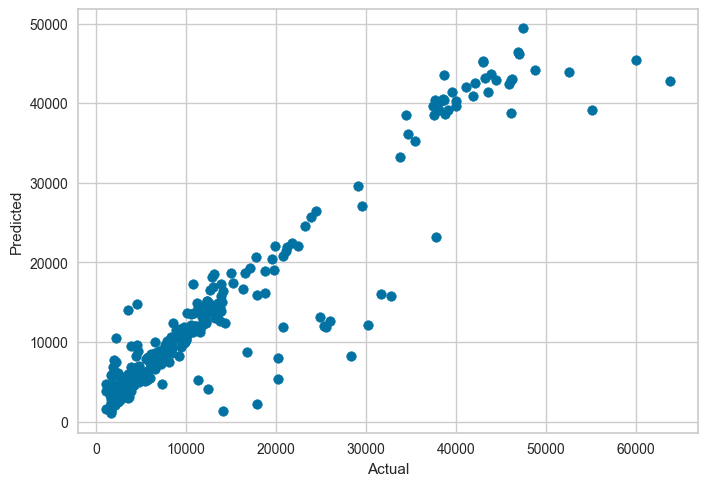

In [56]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

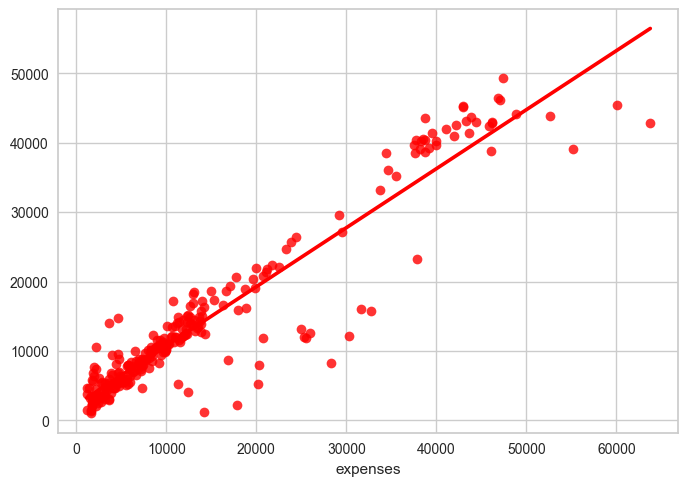

In [57]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [59]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
899,8688.86,10445.345064,-1756.485064
1063,5708.87,8005.753125,-2296.883125
1255,11436.74,14223.206894,-2786.466894
298,38746.36,38627.870722,118.489278
237,4463.21,5613.228862,-1150.018862
...,...,...,...
534,13831.12,12675.910626,1155.209374
542,13887.20,15811.097029,-1923.897029
759,3925.76,9493.989543,-5568.229543
1283,47403.88,49392.101563,-1988.221563
